In [153]:
import csv
import functools
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [154]:
df_states = pd.read_csv('daily_data.csv', usecols=[0,1,2,3])
df_us = pd.read_csv('us_daily.csv')
df_race = pd.read_csv('race_data.csv')
df_race.rename(columns = {'Date':'date', 'Deaths_NHPI':'Deaths_Native_Hawaiian_Pacific_Islander', 'Deaths_AIAN': 'Deaths_americanIndian_alaskanNative'}, inplace=True)

In [155]:
def datez(df):
    df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))
    return df

In [156]:
df_states = df_states['date'] >= pd.to_datetime('2020-04-12')

TypeError: Invalid comparison between dtype=int64 and Timestamp

In [157]:
df_race.index = df_race.index - 55

In [158]:
df_states.index = df_states.index + 1

In [159]:
df_race.drop(['Deaths_Ethnicity_NonHispanic'], axis=1, inplace=True)

In [161]:
datez(df_race)
df_race.index = df_race.index + 55

In [191]:
datez(df_states)
df_states.shape

(7409, 4)

In [192]:
df_race.shape

(1616, 27)

In [194]:
df_states.set_index('state', inplace=True)

KeyError: "None of ['state'] are in the columns"

In [195]:
# df_race['Cases_Total'] = df_race['Cases_Total'].apply(pd.to_numeric, errors='coerce')
# df_race['Cases_Total'] = x.apply(pd.to_numeric, errors='coerce')
df_states.head()

,date,positive,negative
state,,,
AK,2020-07-15,1631.0,154462.0
AL,2020-07-15,59067.0,481982.0
AR,2020-07-15,30297.0,365479.0
AS,2020-07-15,0.0,816.0
AZ,2020-07-15,131354.0,604608.0


In [199]:
df_states.describe()

,positive,negative
count,7394.000000,7.253000e+03
mean,23932.447119,2.187270e+05
std,51605.624956,4.646430e+05
min,0.000000,0.000000e+00
25%,523.000000,9.900000e+03
50%,5314.000000,6.445800e+04
75%,24165.500000,2.297390e+05
max,404006.000000,5.445642e+06


In [211]:
df_race.describe()

,Cases_Total,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,...,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_americanIndian_alaskanNative,Deaths_Native_Hawaiian_Pacific_Islander,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_Unknown
count,1454.000000,1293.000000,561.000000,1165.000000,795.000000,521.000000,417.000000,1235.000000,1424.000000,1169.000000,...,1152.000000,553.000000,1021.000000,567.000000,350.000000,313.000000,1064.000000,1363.000000,1078.000000,1099.000000
mean,3.066713,4660.708430,11608.167558,830.139914,442.777358,203.923225,592.441247,1900.225101,16024.283006,7383.313944,...,480.442708,611.433996,96.532811,22.844797,6.045714,17.504792,78.013158,206.578870,326.178108,261.083712
std,6.030008,6234.118986,17233.796816,1480.753712,1156.671400,481.948810,1054.054921,3337.815226,49872.339909,12926.163784,...,910.953396,1254.227149,256.484805,57.916297,7.316674,25.794320,243.101413,668.036006,933.858375,612.468137
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,415.000000,1271.000000,86.000000,34.500000,21.000000,54.000000,184.000000,483.500000,898.000000,...,35.000000,45.000000,3.000000,2.000000,1.000000,2.000000,5.000000,10.500000,15.000000,18.000000
50%,1.000000,1903.000000,5710.000000,367.000000,104.000000,73.000000,232.000000,609.000000,3059.500000,3306.000000,...,130.500000,142.000000,12.000000,7.000000,4.000000,8.000000,12.000000,42.000000,48.000000,65.000000
75%,3.000000,6331.000000,14155.000000,901.000000,283.500000,213.000000,574.000000,2440.500000,10272.750000,7711.000000,...,476.250000,431.000000,54.000000,16.000000,7.000000,19.000000,35.000000,109.500000,171.000000,154.500000
max,40.000000,48659.000000,137657.000000,14187.000000,8827.000000,8787.000000,5428.000000,37417.000000,406807.000000,137657.000000,...,6345.000000,6658.000000,1702.000000,512.000000,40.000000,111.000000,1805.000000,7929.000000,6658.000000,5426.000000


In [215]:
df_race.set_index('State', inplace=True)

In [218]:
df_states.sort_values(by=['date'], inplace=True, ascending=True)

In [220]:
df_race.sort_values(by=['date'], inplace=True, ascending=True)

In [319]:

df_states_groupby = df_states.groupby('state').sum().sort_values('positive')
df_states_groupby.describe()

,positive,negative
count,5.600000e+01,5.600000e+01
mean,3.159938e+06,2.832906e+07
std,5.371209e+06,3.842556e+07
min,0.000000e+00,2.329900e+04
25%,4.111938e+05,6.121090e+06
50%,1.315333e+06,1.794885e+07
75%,3.517736e+06,3.474759e+07
max,3.487869e+07,1.987453e+08


In [308]:
df_states.drop(['level_0', 'index'], axis=1, inplace=True)

**Graphs of Total Positive Covid Cases by State**

In [326]:
df_state_25 = df_states_groupby[df_states_groupby['positive'] <= 411193]
df_state_50 = df_states_groupby[(df_states_groupby['positive'] > 411193) & (df_states_groupby['positive'] <= 1315333)]
df_state_75 = df_states_groupby[(df_states_groupby['positive'] > 1315333) & (df_states_groupby['positive'] <= 3517736)]
df_state_100 = df_states_groupby[(df_states_groupby['positive'] > 3517736) & (df_states_groupby['positive'] <= 34878690)]

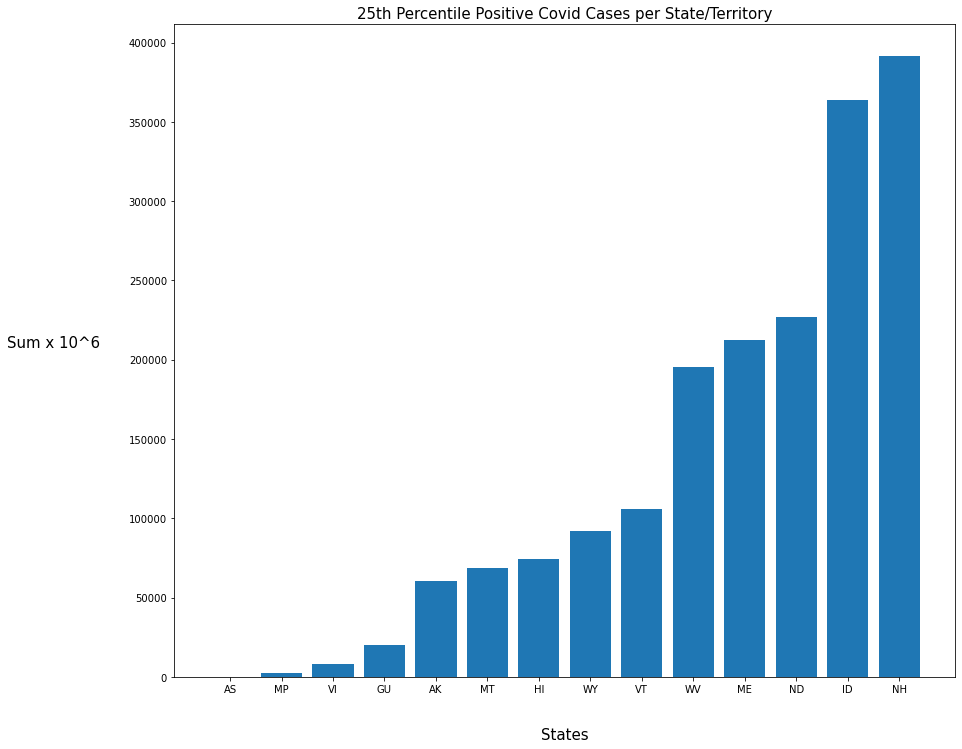

In [354]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_state_25.index, height=df_state_25['positive'])
ax.set_title('25th Percentile Positive Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum x 10^6', rotation=0, labelpad=75, fontsize=15)
plt.show()

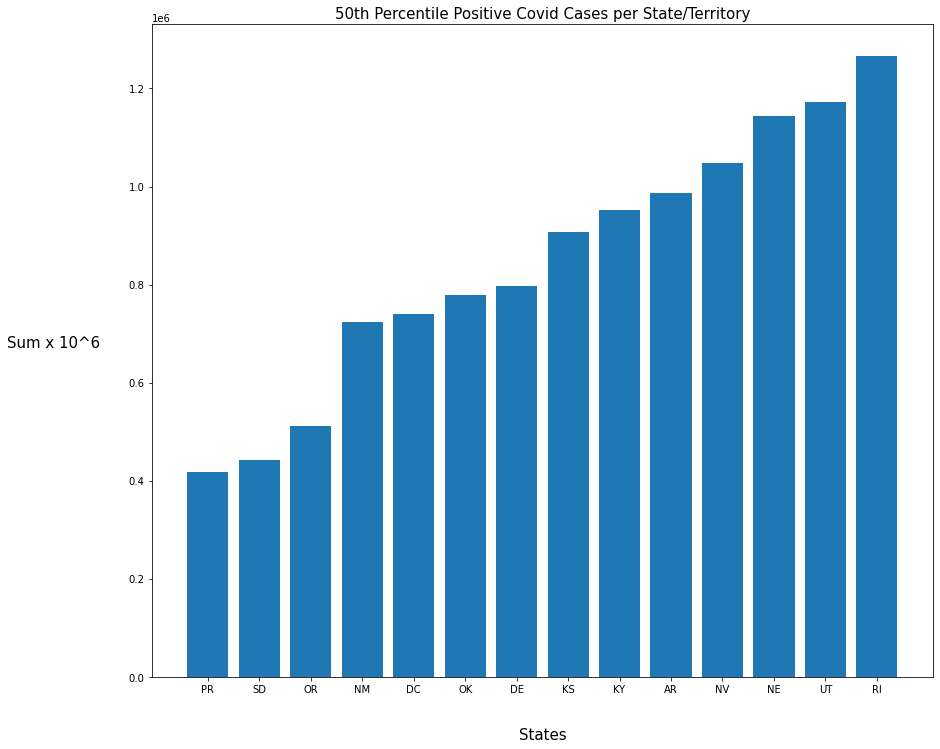

In [355]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_state_50.index, height=df_state_50['positive'])
ax.set_title('50th Percentile Positive Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum x 10^6', rotation=0, labelpad=75, fontsize=15)
plt.show()

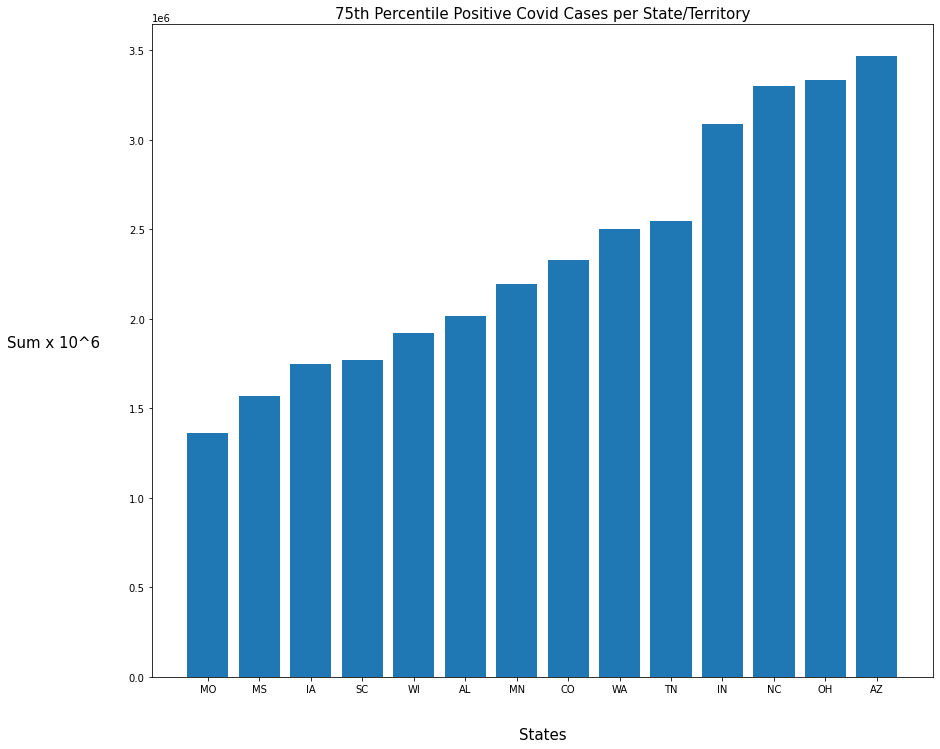

In [356]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_state_75.index, height=df_state_75['positive'])
ax.set_title('75th Percentile Positive Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum x 10^6', rotation=0, labelpad=75, fontsize=15)
plt.show()

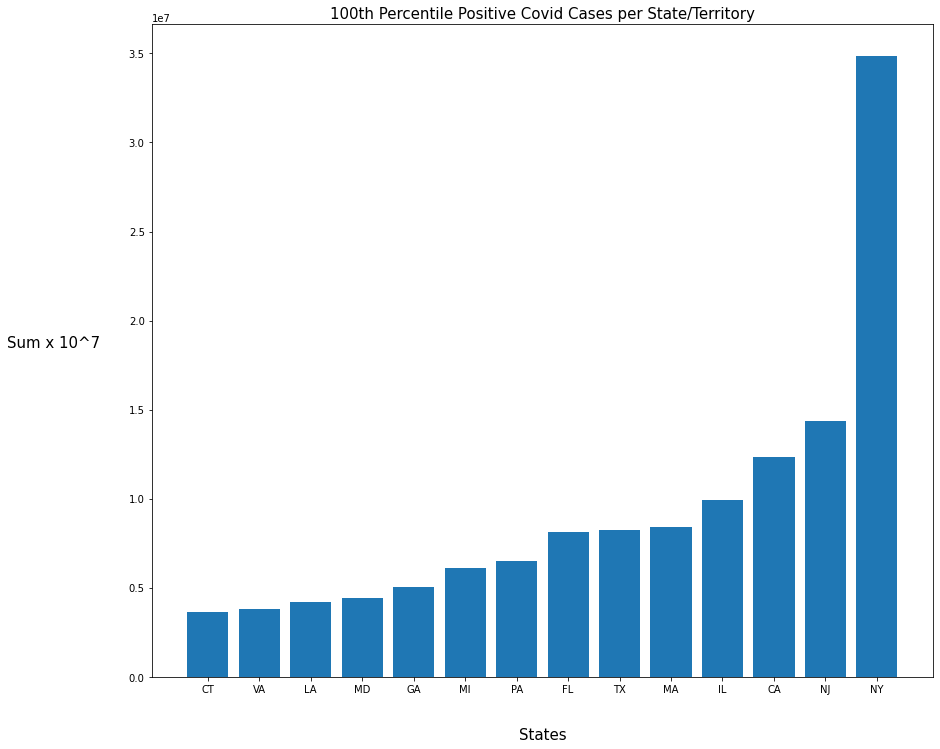

In [352]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_state_100.index, height=df_state_100['positive'])
ax.set_title('100th Percentile Positive Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum x 10^7', rotation=0, labelpad=75, fontsize=15)
plt.show()

In [357]:
df_race

,Cases_Total,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,...,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_americanIndian_alaskanNative,Deaths_Native_Hawaiian_Pacific_Islander,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_Unknown
count,1454.000000,1293.000000,561.000000,1165.000000,795.000000,521.000000,417.000000,1235.000000,1424.000000,1169.000000,...,1152.000000,553.000000,1021.000000,567.000000,350.000000,313.000000,1064.000000,1363.000000,1078.000000,1099.000000
mean,3.066713,4660.708430,11608.167558,830.139914,442.777358,203.923225,592.441247,1900.225101,16024.283006,7383.313944,...,480.442708,611.433996,96.532811,22.844797,6.045714,17.504792,78.013158,206.578870,326.178108,261.083712
std,6.030008,6234.118986,17233.796816,1480.753712,1156.671400,481.948810,1054.054921,3337.815226,49872.339909,12926.163784,...,910.953396,1254.227149,256.484805,57.916297,7.316674,25.794320,243.101413,668.036006,933.858375,612.468137
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,415.000000,1271.000000,86.000000,34.500000,21.000000,54.000000,184.000000,483.500000,898.000000,...,35.000000,45.000000,3.000000,2.000000,1.000000,2.000000,5.000000,10.500000,15.000000,18.000000
50%,1.000000,1903.000000,5710.000000,367.000000,104.000000,73.000000,232.000000,609.000000,3059.500000,3306.000000,...,130.500000,142.000000,12.000000,7.000000,4.000000,8.000000,12.000000,42.000000,48.000000,65.000000
75%,3.000000,6331.000000,14155.000000,901.000000,283.500000,213.000000,574.000000,2440.500000,10272.750000,7711.000000,...,476.250000,431.000000,54.000000,16.000000,7.000000,19.000000,35.000000,109.500000,171.000000,154.500000
max,40.000000,48659.000000,137657.000000,14187.000000,8827.000000,8787.000000,5428.000000,37417.000000,406807.000000,137657.000000,...,6345.000000,6658.000000,1702.000000,512.000000,40.000000,111.000000,1805.000000,7929.000000,6658.000000,5426.000000


In [361]:
df_race_groupby = df_race.groupby('State').sum().sort_values('Cases_Black')

In [362]:
df_race_groupby.describe()

,Cases_Total,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,...,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_americanIndian_alaskanNative,Deaths_Native_Hawaiian_Pacific_Islander,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_Unknown
count,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,79.625000,107612.428571,1.162890e+05,17269.875000,6285.857143,1897.214286,4411.571429,41906.750000,4.074746e+05,1.541267e+05,...,9883.392857,6037.910714,1760.000000,231.303571,37.785714,97.839286,1482.250000,5027.982143,6278.928571,5123.767857
std,133.119845,142823.640294,2.644218e+05,32807.583122,20366.720838,4331.661381,16294.267225,62947.377185,1.120932e+06,2.575087e+05,...,21422.367523,20795.994576,5562.506044,758.010192,103.532290,366.410539,5113.166414,14102.664961,19701.670025,11722.250302
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,3632.750000,0.000000e+00,987.250000,0.000000,0.000000,0.000000,709.250000,2.186475e+04,2.697750e+03,...,38.750000,0.000000,0.000000,0.000000,0.000000,0.000000,6.750000,255.250000,100.750000,80.500000
50%,25.500000,32831.000000,2.885000e+02,7083.000000,614.500000,0.000000,0.000000,12938.500000,8.804800e+04,6.527100e+04,...,1683.000000,0.000000,138.500000,2.000000,0.000000,0.000000,182.000000,1290.000000,615.500000,1159.500000
75%,95.000000,168738.000000,1.148630e+05,18334.500000,3833.500000,820.500000,1017.500000,52439.750000,3.043338e+05,1.664140e+05,...,9061.000000,1685.000000,826.000000,106.500000,11.000000,0.000000,562.250000,2934.000000,2783.000000,2767.000000
max,786.000000,526066.000000,1.465630e+06,208512.000000,117445.000000,18702.000000,114907.000000,331790.000000,7.951400e+06,1.455028e+06,...,134519.000000,139590.000000,35675.000000,5025.000000,664.000000,2563.000000,36531.000000,93021.000000,131400.000000,65325.000000


In [363]:
df_raceBl_25 = df_race_groupby[df_race_groupby['Cases_Black'] <= 3632.75]
df_raceBl_50 = df_race_groupby[(df_race_groupby['Cases_Black'] > 3632.75) & (df_race_groupby['Cases_Black'] <= 32831)]
df_raceBl_75 = df_race_groupby[(df_race_groupby['Cases_Black'] > 32831) & (df_race_groupby['Cases_Black'] <= 168738)]
df_raceBl_100 = df_race_groupby[(df_race_groupby['Cases_Black'] > 168738) & (df_race_groupby['Cases_Black'] <= 526066)]

**Graphs of Sum of Black patients who tested positive for Covid**

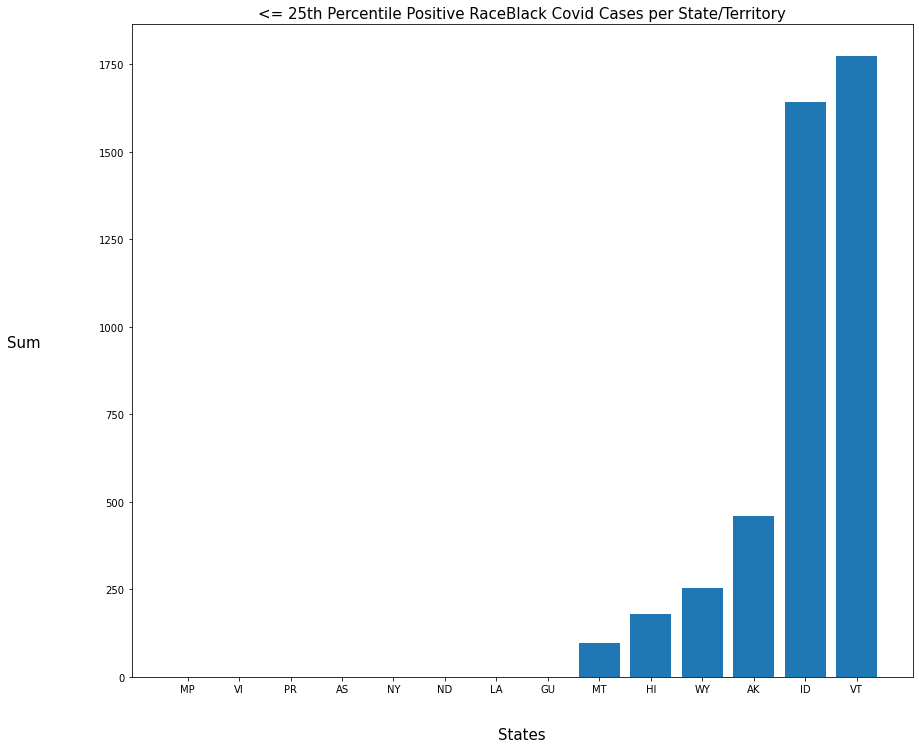

In [368]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_raceBl_25.index, height=df_raceBl_25['Cases_Black'])
ax.set_title('<= 25th Percentile Positive RaceBlack Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

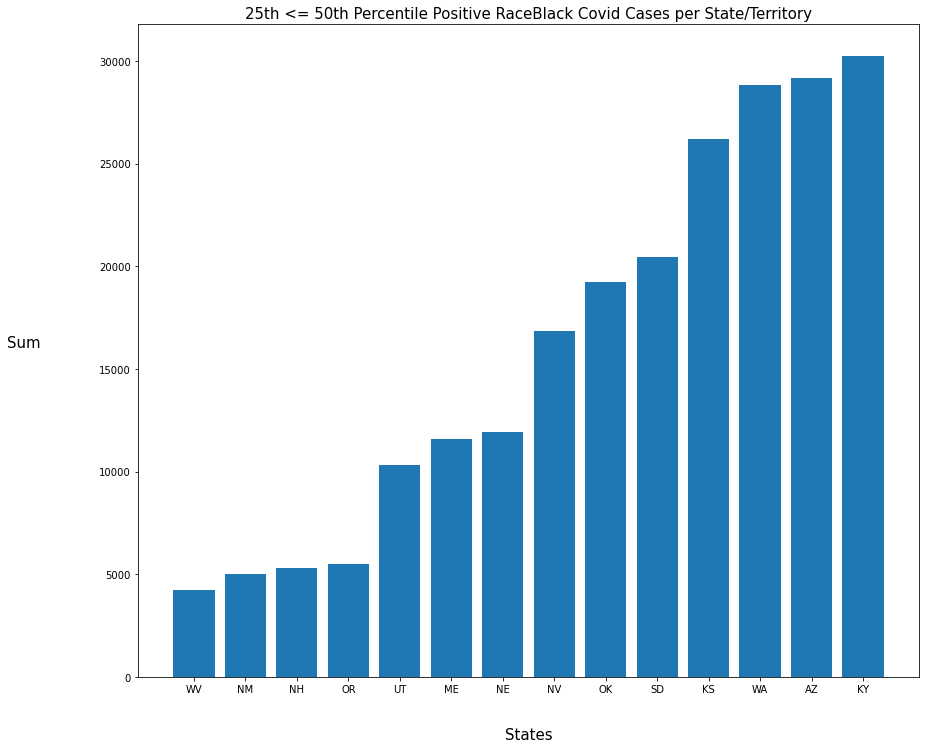

In [369]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_raceBl_50.index, height=df_raceBl_50['Cases_Black'])
ax.set_title('25th <= 50th Percentile Positive RaceBlack Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

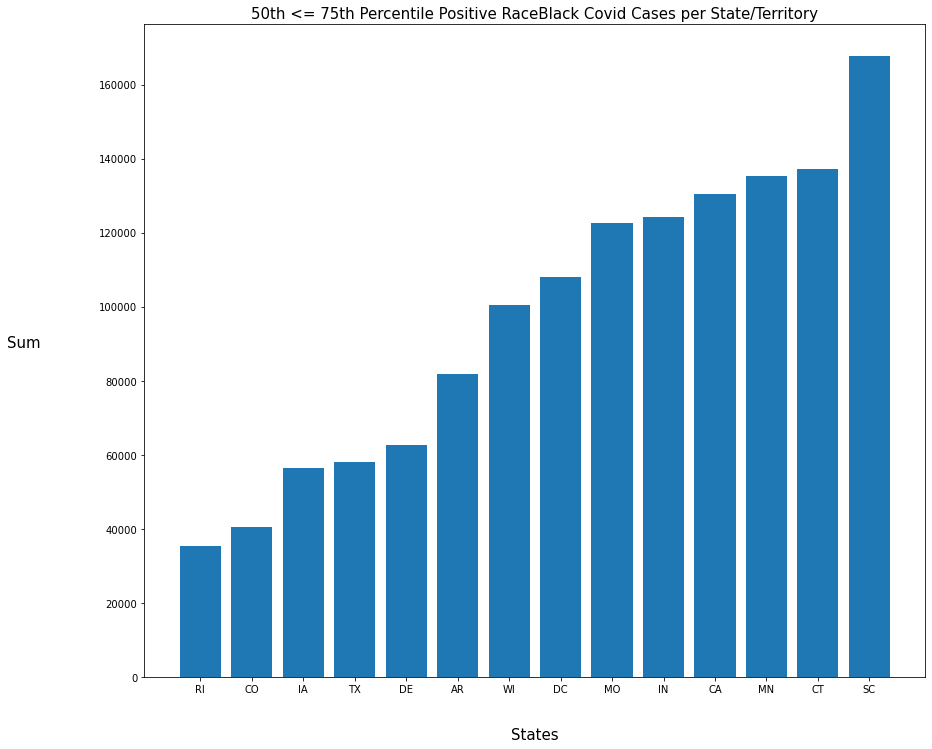

In [370]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_raceBl_75.index, height=df_raceBl_75['Cases_Black'])
ax.set_title('50th <= 75th Percentile Positive RaceBlack Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

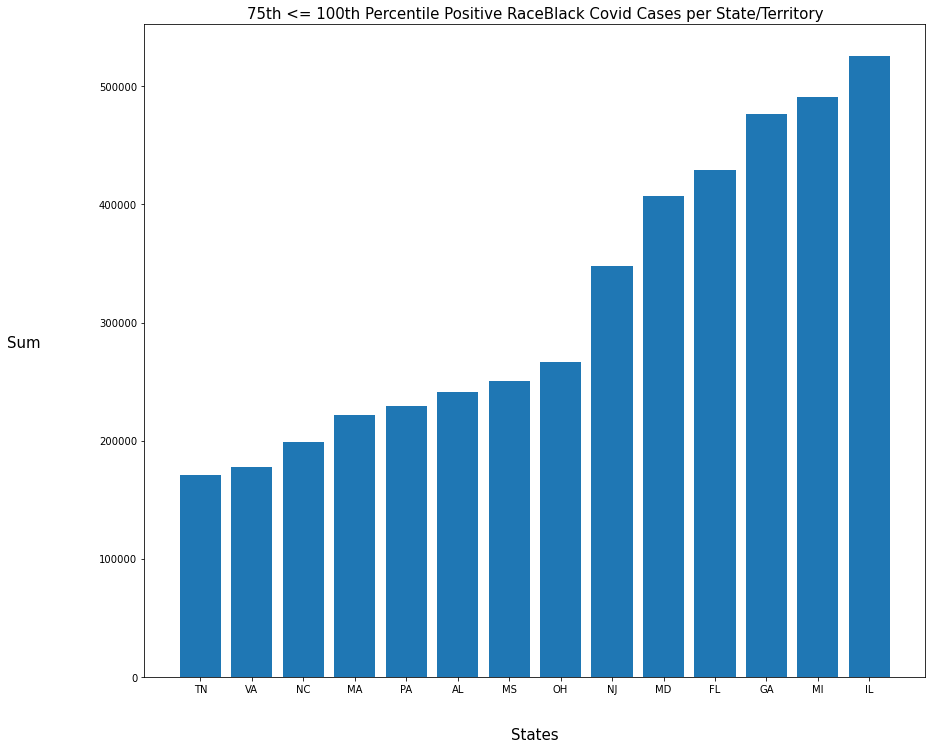

In [371]:
fig, ax = plt.subplots(figsize=(14,12))
ax.bar(x = df_raceBl_100.index, height=df_raceBl_100['Cases_Black'])
ax.set_title('75th <= 100th Percentile Positive RaceBlack Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

**Graphs of Sum of LatinX patients who tested positive for Covid**

In [376]:
df_race_groupby_LAX = df_race.groupby('State').sum().sort_values('Cases_LatinX')
df_race_groupby_LAX.describe()

,Cases_Total,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,...,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_americanIndian_alaskanNative,Deaths_Native_Hawaiian_Pacific_Islander,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_Unknown
count,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,79.625000,107612.428571,1.162890e+05,17269.875000,6285.857143,1897.214286,4411.571429,41906.750000,4.074746e+05,1.541267e+05,...,9883.392857,6037.910714,1760.000000,231.303571,37.785714,97.839286,1482.250000,5027.982143,6278.928571,5123.767857
std,133.119845,142823.640294,2.644218e+05,32807.583122,20366.720838,4331.661381,16294.267225,62947.377185,1.120932e+06,2.575087e+05,...,21422.367523,20795.994576,5562.506044,758.010192,103.532290,366.410539,5113.166414,14102.664961,19701.670025,11722.250302
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,3632.750000,0.000000e+00,987.250000,0.000000,0.000000,0.000000,709.250000,2.186475e+04,2.697750e+03,...,38.750000,0.000000,0.000000,0.000000,0.000000,0.000000,6.750000,255.250000,100.750000,80.500000
50%,25.500000,32831.000000,2.885000e+02,7083.000000,614.500000,0.000000,0.000000,12938.500000,8.804800e+04,6.527100e+04,...,1683.000000,0.000000,138.500000,2.000000,0.000000,0.000000,182.000000,1290.000000,615.500000,1159.500000
75%,95.000000,168738.000000,1.148630e+05,18334.500000,3833.500000,820.500000,1017.500000,52439.750000,3.043338e+05,1.664140e+05,...,9061.000000,1685.000000,826.000000,106.500000,11.000000,0.000000,562.250000,2934.000000,2783.000000,2767.000000
max,786.000000,526066.000000,1.465630e+06,208512.000000,117445.000000,18702.000000,114907.000000,331790.000000,7.951400e+06,1.455028e+06,...,134519.000000,139590.000000,35675.000000,5025.000000,664.000000,2563.000000,36531.000000,93021.000000,131400.000000,65325.000000


In [378]:
df_race_groupby_LAX25 = df_race_groupby_LAX[df_race_groupby_LAX['Cases_LatinX'] <= 0]
df_race_groupby_LAX50 = df_race_groupby_LAX[(df_race_groupby_LAX['Cases_LatinX'] > 0) & (df_race_groupby_LAX['Cases_LatinX'] <= 288.5)]
df_race_groupby_LAX75 = df_race_groupby_LAX[(df_race_groupby_LAX['Cases_LatinX'] > 288.5) & (df_race_groupby_LAX['Cases_LatinX'] <= 114863)]
df_race_groupby_LAX100 = df_race_groupby_LAX[(df_race_groupby_LAX['Cases_LatinX'] > 114863) & (df_race_groupby_LAX['Cases_LatinX'] <= 1465630)]

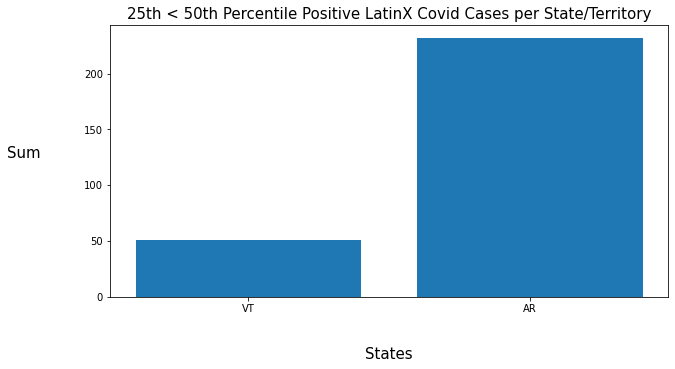

In [384]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x = df_race_groupby_LAX50.index, height=df_race_groupby_LAX50['Cases_LatinX'])
ax.set_title('25th < 50th Percentile Positive LatinX Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=60, fontsize=15)
plt.show()

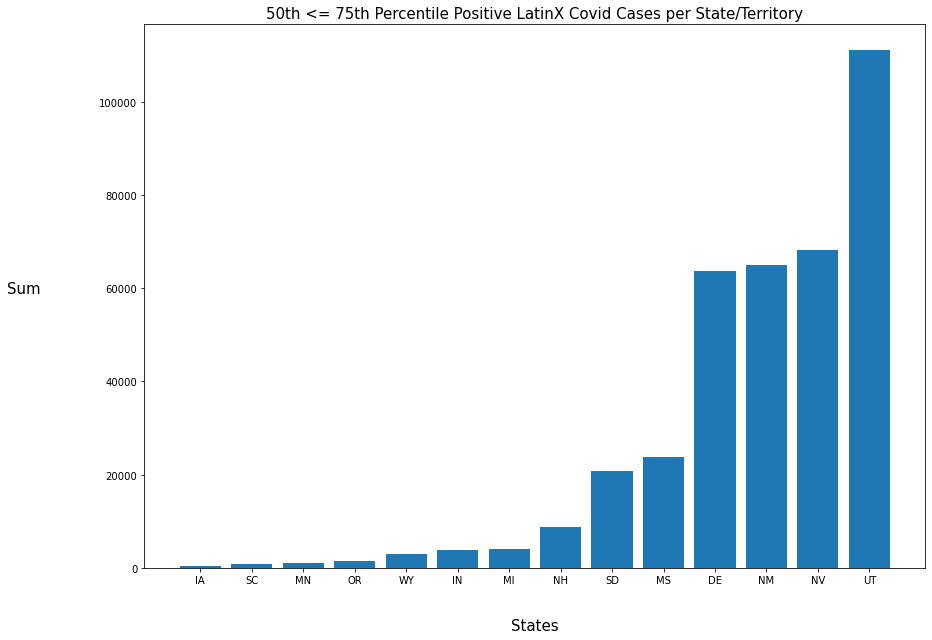

In [386]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_race_groupby_LAX75.index, height=df_race_groupby_LAX75['Cases_LatinX'])
ax.set_title('50th <= 75th Percentile Positive LatinX Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

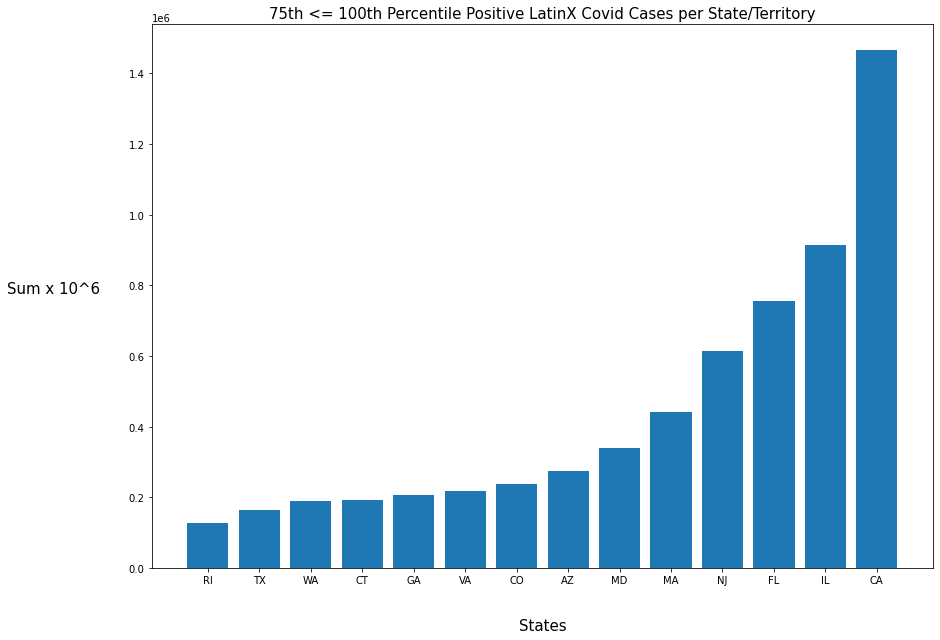

In [390]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_race_groupby_LAX100.index, height=df_race_groupby_LAX100['Cases_LatinX'])
ax.set_title('75th <= 100th Percentile Positive LatinX Covid Cases per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum x 10^6', rotation=0, labelpad=75, fontsize=15)
plt.show()

In [388]:
len(df_race_groupby_LAX50) + len(df_race_groupby_LAX75) + len(df_race_groupby_LAX100)

30

In [389]:
len(df_raceBl_25) + len(df_raceBl_50) + len(df_raceBl_75) + len(df_raceBl_100)

56